### ANALYSE EXPLORATOIRE DES DONNEES 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
import os 

from sklearn.preprocessing import LabelEncoder

In [2]:
def datacleaning(dataframe): 
    # Séparer les colonnes numériques et catégoriques
    cat_data_train = dataframe.select_dtypes(include=['object']).copy()
    num_data_train = dataframe.select_dtypes(exclude=['object']).copy()

    # Imputation des valeurs manquantes
    num_data_train.fillna(method='bfill', inplace=True)
    num_data_train.fillna(method='ffill', inplace=True)  # Optionnel
    cat_data_train = cat_data_train.apply(lambda x: x.fillna(x.mode()[0]))

    # Suppression d'une colonne spécifique si elle existe
    if 'Loan_ID' in cat_data_train.columns:
        cat_data_train.drop(columns=['Loan_ID'], inplace=True)

    # Concaténation des DataFrames nettoyés
    df_cleaned = pd.concat([num_data_train, cat_data_train], axis=1)
    
    return df_cleaned

In [3]:
path = os.getcwd()
chemin_repertoire = os.path.join(path, '../dataset')

# chemin des fichiers
chemin_train= os.path.join(chemin_repertoire, 'train_data.csv')

In [4]:
df_train = pd.read_csv(chemin_train)

In [5]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_cleaned = datacleaning(df_train)

C:\Users\NAZIFOU\AppData\Local\Temp\ipykernel_3608\332775789.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data_train.fillna(method='bfill', inplace=True)
C:\Users\NAZIFOU\AppData\Local\Temp\ipykernel_3608\332775789.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data_train.fillna(method='ffill', inplace=True)  # Optionnel


In [10]:
print("Valeur manquantes :", df_cleaned.isnull().sum().any())  

Valeur manquantes : False


In [11]:
df_cleaned.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,128.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y


## Analyse univarié

#### Variable cible  Loan_Status  (target)

In [12]:
target = df_cleaned['Loan_Status'] 

target.value_counts().to_frame()

,count
Loan_Status,
Y,422
N,192


Le pourcentage de crédits accordés est: 68.73%
Le pourcentage de crédits refusés est: 31.27%


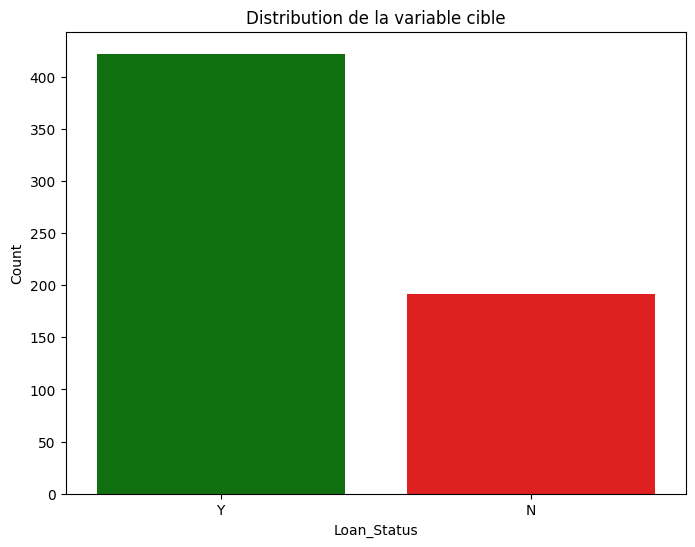

In [13]:
plt.figure(figsize=(8, 6))

sns.countplot(x=target, hue=target, palette=['green', 'red'], legend=False)

yes = target.value_counts()['Y'] / len(target) * 100
no = target.value_counts()['N'] / len(target) * 100

plt.title('Distribution de la variable cible')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

print(f'Le pourcentage de crédits accordés est: {yes:.2f}%')
print(f'Le pourcentage de crédits refusés est: {no:.2f}%')

plt.show()

c:\Users\NAZIFOU\Bank-loan-prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


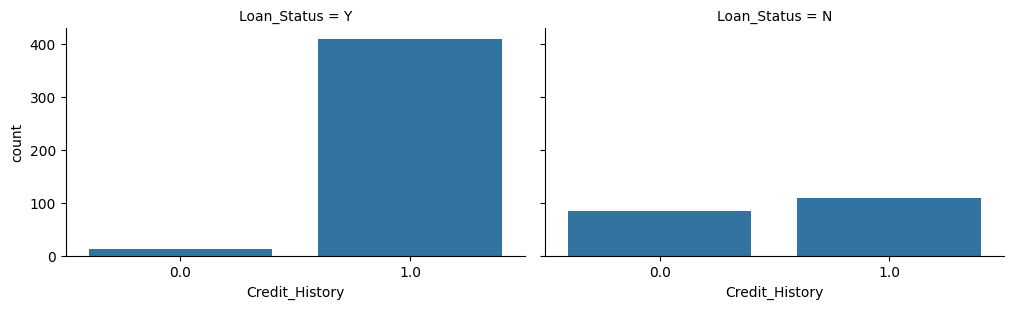

In [14]:
# credit history
grid = sns.FacetGrid(df_cleaned, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

c:\Users\NAZIFOU\Bank-loan-prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


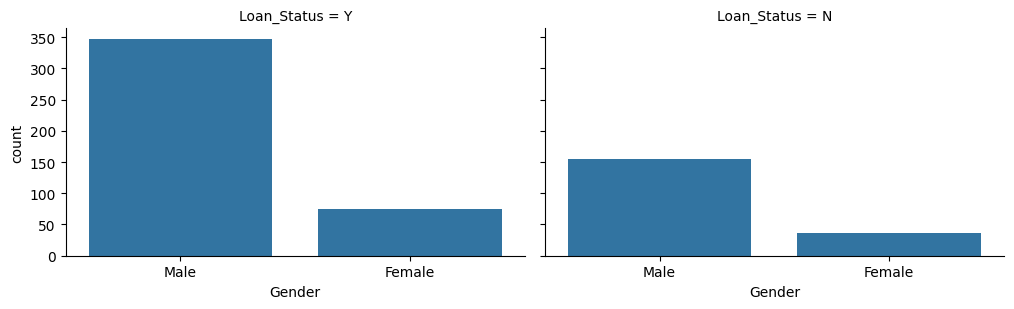

In [15]:
# Sexe 
grid = sns.FacetGrid(df_cleaned, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

c:\Users\NAZIFOU\Bank-loan-prediction\venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


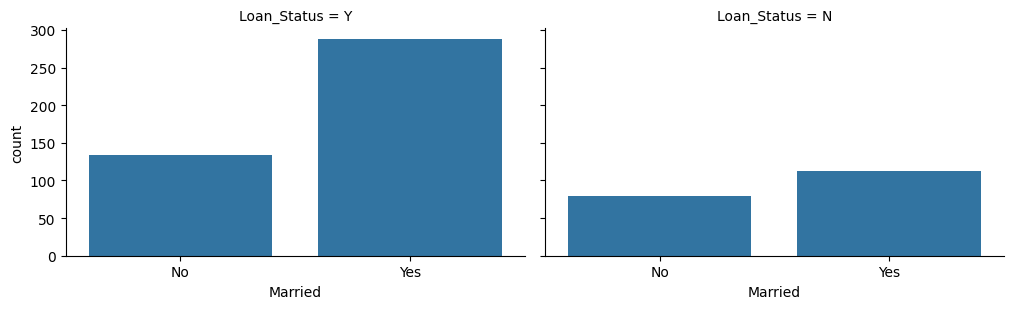

In [16]:
# Marié
grid = sns.FacetGrid(df_cleaned, col='Loan_Status', height=3.2, aspect=1.6)    
grid.map(sns.countplot, 'Married')   

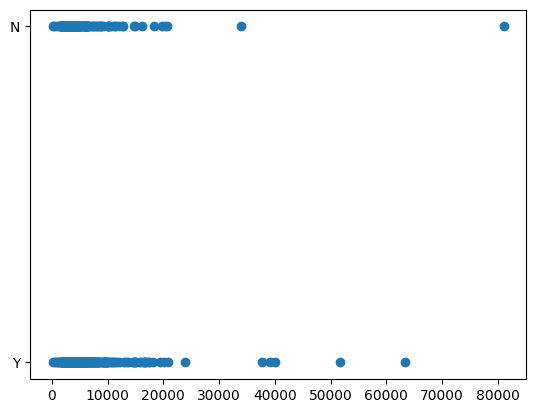

In [17]:
plt.scatter(df_cleaned['ApplicantIncome'], df_train_cleaned['Loan_Status'])

In [19]:
df_cleaned.groupby('Loan_Status').median(numeric_only=True)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,132.5,360.0,1.0
Y,3812.5,1239.5,127.5,360.0,1.0


In [75]:
def save_cleaned_data(dataframe, path):
    """
    Sauvegarde un DataFrame sous forme de fichier CSV.
    Crée le dossier s'il n'existe pas.
    
    Args:
        dataframe (pd.DataFrame): Le DataFrame à sauvegarder.
        path (str): Le chemin du fichier CSV.
    """
    
    # Extraire le répertoire du fichier
    directory = os.path.dirname(path)
    
    # Créer le dossier s'il n'existe pas
    if directory and not os.path.exists(directory):
        os.makedirs(directory)

    try:
        # Sauvegarde du DataFrame
        dataframe.to_csv(path, index=False)
        print(f"✅ Fichier enregistré avec succès : {path}")
    except Exception as e:
        print(f"❌ Erreur lors de l'enregistrement du fichier : {e}")

In [20]:
df_cleaned.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
from  cleaning_preprocess_ML import save_cleaned_data

save_cleaned_data(df_cleaned, '../dataset/train_data_cleaned.csv')

ModuleNotFoundError: No module named 'cleaning_preprocess_ML'